In [1]:
from pdf2image import convert_from_path
opts = dict(first_page=2,transparent=True, size=(800))
a_p = convert_from_path('pdfs/N3_6_listas_introduccion.pdf', **opts)
b_p = convert_from_path('pdfs/N3_4_mas_sobre_strings.pdf', **opts)
c_p = convert_from_path('pdfs/N3_6_listas_introduccion.pdf', first_page=7,transparent=True, size=(1000))
d_p = convert_from_path('pdfs/N3_7_listas_operaciones.pdf', **opts)
presentations = [a_p,b_p,c_p,d_p]
pres = a_p
pres_num = 0
page = -1

def p(skip=False):
    global page
    page += 1
    if skip:
        return None
    else:
        return pres[page%len(pres)]

def switch():
    global pres_num
    global pres
    global page
    page = -1
    pres_num += 1
    pres = presentations[pres_num%len(presentations)]

In [2]:
from IPython.display import display, Image, Video, HTML as ht, Markdown as md
from base64 import b64encode
from PIL import Image as PImage
from io import BytesIO
import math
import random

def display_video(path, caption="", w=300, autoplay=True, loop=True):
    file = open(path, "rb")
    video_data = file.read()
    video_data_encoded = b64encode(video_data)

    video_container = '<div align="center" class="figureContainer">'
    video_container += '<video width="{}" controls'.format(w)
    video_container += " autoplay " if autoplay else ""
    video_container += " loop>" if loop else ">"
    video_container += """<source src="data:video/mp4;base64,{}">
        </video>
        </div>""".format(
        video_data_encoded.decode()
    )
    display(ht(video_container))
    text = '<div align="center">'
    text += (
        '<span style="font-weight:bold" class="figureCaption">Video {}: </span>'
        + caption
    )
    display(ht(text.format('')))
    display(ht("</div>"))
    
def display_image(path, caption, w=800):
    image_data_encoded = resizeImage(path, w)
    image_container = """<div align="center" class="figureContainer">
    <img src="data:image/png;base64,{}"/>
    </div>""".format(
        image_data_encoded.decode()
    )
    display(ht(image_container))
    text = '<div align="center" class="figureCaption">'
    text += '<span style="font-weight:bold">Figure {}: </span>' + caption
    display(ht(text.format('')))
    display(ht("</div>"))
    
def resizeImage(path, w):
    output = BytesIO()
    im = PImage.open(path)
    wpercent = w / float(im.size[0])
    hsize = int((float(im.size[1]) * float(wpercent)))
    im = im.resize((w, hsize), PImage.LANCZOS)
    im.save(output, format="PNG")
    image_data = output.getvalue()
    return b64encode(image_data)

In [3]:
import altair as alt
import pandas as pd

# Nivel 3 - Repetir Acciones

## Operaciones sobre cadenas

### David Naranjo

### da-naran@uniandes.edu.co

# Operaciones sobre listas

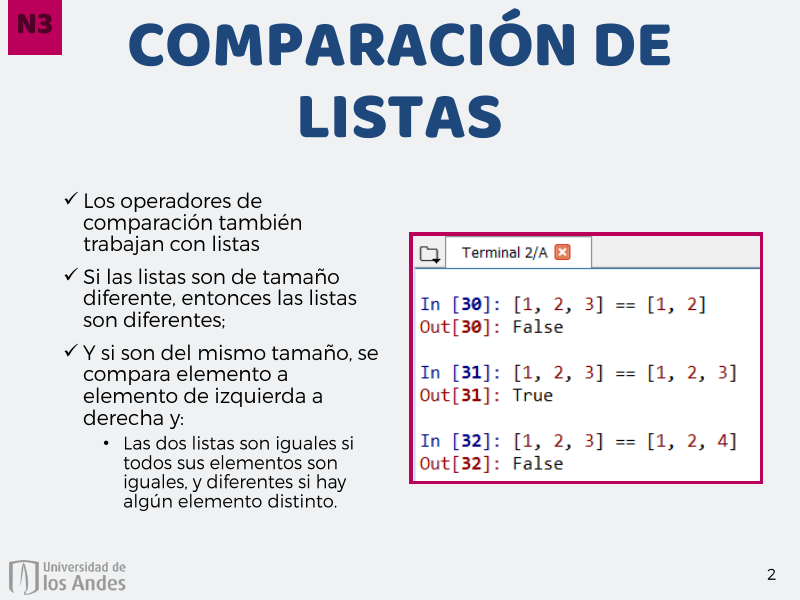

In [72]:
switch()
p()

In [149]:
[1,2,3]==[3,2,1]

False

In [150]:
[1,2,3]==[1,1,2,3]

False

In [152]:
[123]==[1,2,3]

False

In [153]:
['1','2','3']==[1,2,3]

False

## Ejercicio

Hacer una función que me responda si hay elementos repetidos en una lista 

In [158]:
def hay_elementos_repetidos(lista:list)->bool:
    temporal = []
    respuesta = False
    i = 0
    while i<len(lista):
        if lista[i] not in temporal:
            temporal.append(lista[i])
        else:
            respuesta = True
        i+=1
    return respuesta

letras = ['a','x','w','x']
hay_elementos_repetidos(letras)

True

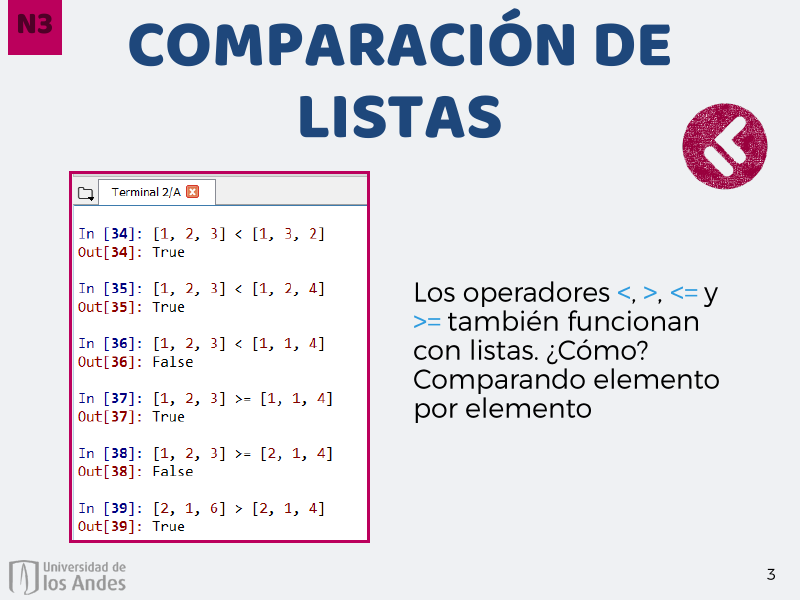

In [78]:
p()

In [163]:
list(range(-1, 10)) > list(range(-2, 10))

True

In [162]:
list(range(-2, 10))

[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [164]:
len(list(range(-1, 10))) > len(list(range(-2, 10)))

False

In [176]:
[4,1,3]<=[4]

False

In [182]:
str([1,2,3])>=str([-1,2,3])

True

In [183]:
["1", "2", "3"] >= [1, 2, 3]

TypeError: '>=' not supported between instances of 'str' and 'int'

In [184]:
frutitas > mas_frutas

True

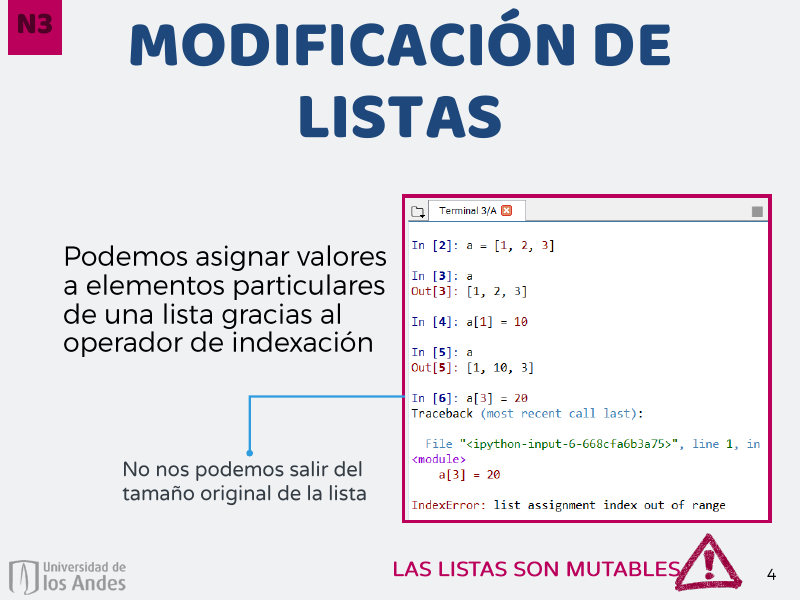

In [85]:
p()

## Operador de indexación [ ]

In [187]:
frutitas = ["🍏", "🍎", "🍐", "🍊", "🍋", "🍌", "🍉", "🍇"]

In [188]:
frutitas[4] = "🍊"

In [192]:
print(frutitas)

['🍏', '🍎', '🍐', '🍊', '🍊', '🍌', '🍉', '🍇']


In [193]:
frutitas[-1] = "🍊"

In [194]:
print(frutitas)

['🍏', '🍎', '🍐', '🍊', '🍊', '🍌', '🍉', '🍊']


In [202]:
frutitas[random.randint(0, len(frutitas)-1)] = "🍅"

In [203]:
print(frutitas)

['🍏', '🍅', '🍅', '🍅', '🍅', '🍌', '🍉', '🍊']


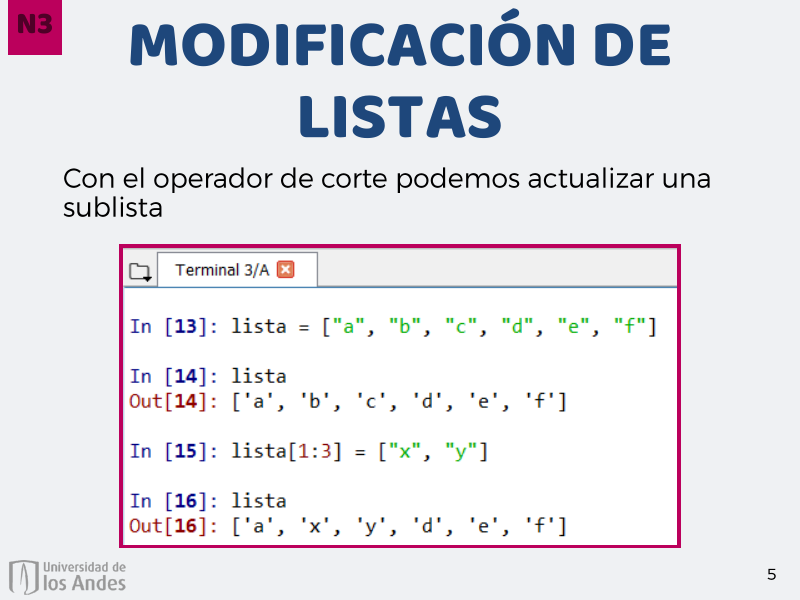

In [93]:
p()

## Modificar usando rangos [:]

In [204]:
frutitas = ["🍏", "🍎", "🍐", "🍊", "🍋", "🍌", "🍉", "🍇"]

In [210]:
mas_frutas = ["🍓", "🍈", "🍒", "🍑", "🥭", "🍍", "🥥", "🥝"]

In [212]:
mas_frutas[2:] = []

In [213]:
print(mas_frutas)

['🍓', '🍈']


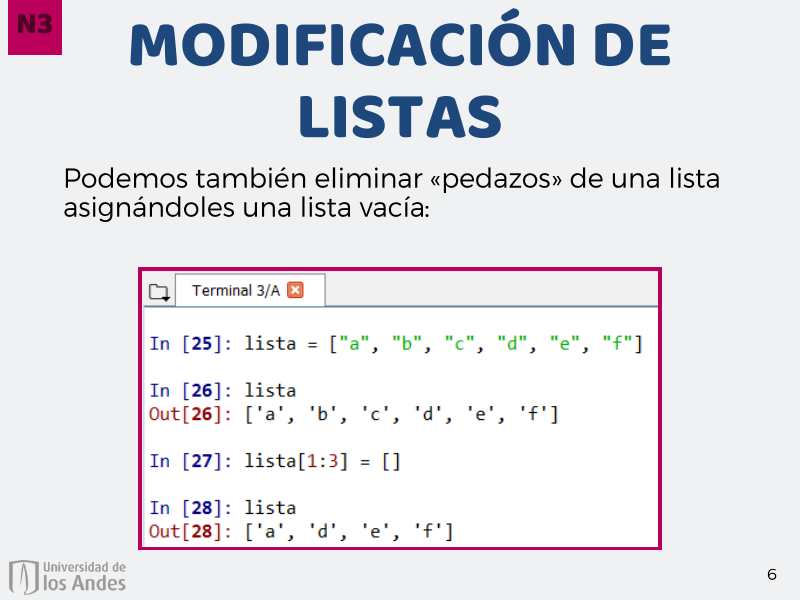

In [98]:
p()

## Eliminación de rangos

In [242]:
mas_frutas = ["🍓", "🍈", "🍒", "🍑", "🥭", "🍍", "🥥", "🥝", "🍅"]

In [248]:
mas_frutas[3:3] = ['🥝',"🍈", "🍒"]

In [249]:
print(mas_frutas)

['🍓', '🍈', '🍒', '🥝', '🍈', '🍒', '🥝', '🥝', '🍑', '🥭', '🍍', '🥥', '🥝', '🍅']


Cómo eliminamos un solo elemento?

In [227]:
mas_frutas[0]

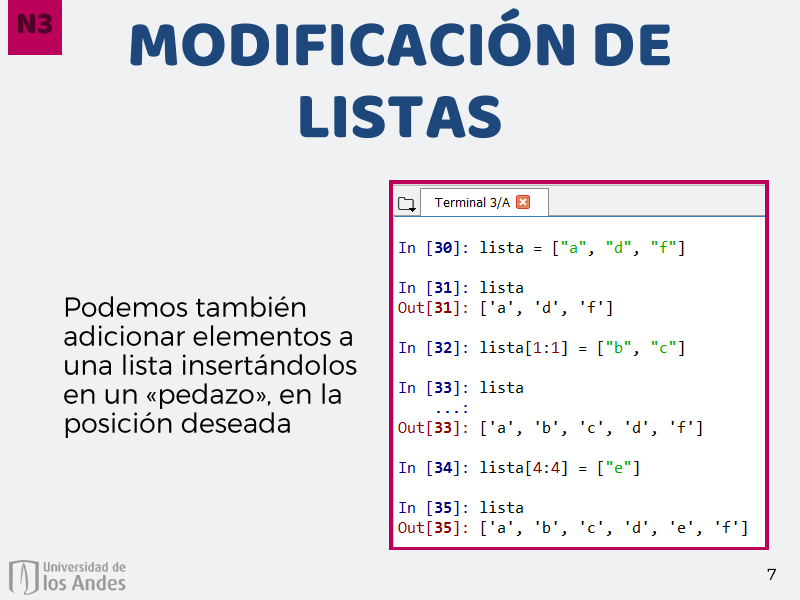

In [102]:
p()

## Inserción

In [250]:
print(mas_frutas)

['🍓', '🍈', '🍒', '🥝', '🍈', '🍒', '🥝', '🥝', '🍑', '🥭', '🍍', '🥥', '🥝', '🍅']


In [262]:
mas_frutas[:3] = [1]

In [263]:
print(mas_frutas)

[1, '🍈', '🍒', '🥝', '🍈', '🍒', '🥝', '🥝', '🍑', '🥭', '🍍', '🥥', '🥝', '🍅']


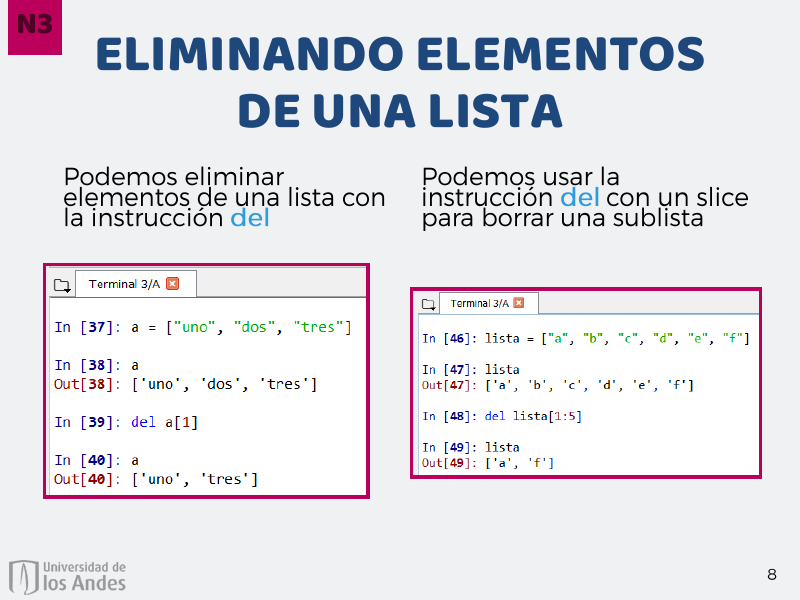

In [106]:
p()

## Eliminación (otra vez)

In [265]:
frutitas = ["🍏", "🍎", "🍐", "🍊", "🍋", "🍌", "🍉", "🍇"]

In [267]:
del frutitas[1:3]

In [268]:
print(frutitas)

['🍏', '🍊', '🍋', '🍌', '🍉', '🍇']


In [110]:
print(frutitas)

['🍏', '🍎', '🍐', '🍊', '🍋', '🍌', '🍉', '🍇']


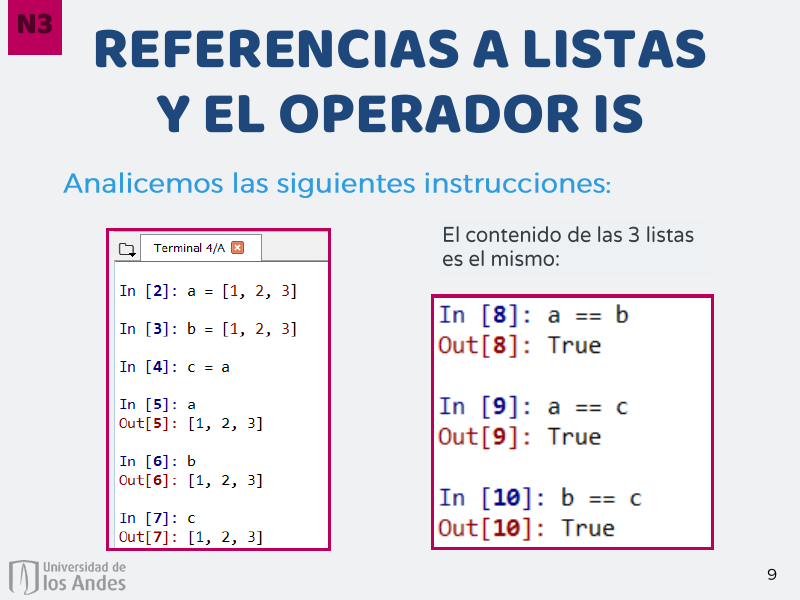

In [111]:
p()

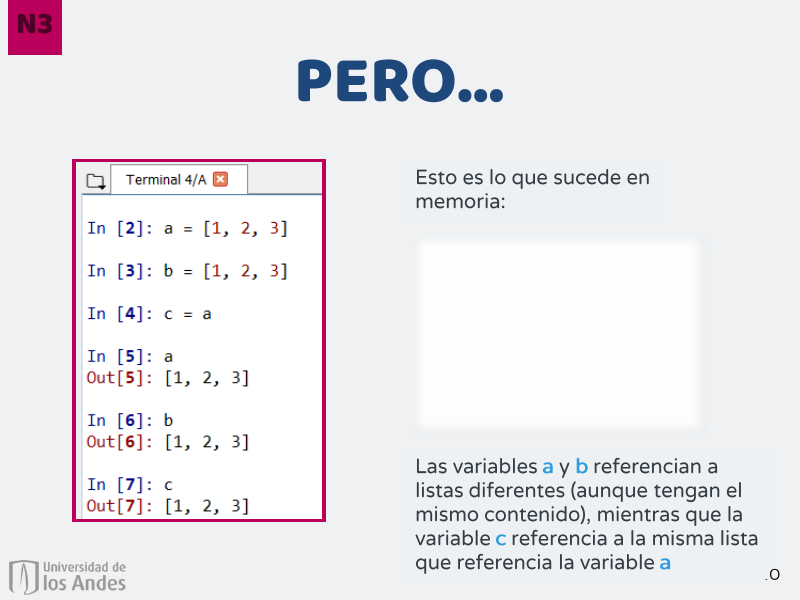

In [112]:
p()

# Variables y referencias

In [293]:
fruteria_1 = ["🍏", "🍎", "🍐", "🍊", "🍋", "🍌", "🍉", "🍇", "🍓", "🍈", "🍒", "🍑", "🥭", "🍍", "🥥", "🥝", "🍅"]

In [294]:
fruteria_2 = ["🍏", "🍎", "🍐", "🍊", "🍋", "🍌", "🍉", "🍇", "🍓", "🍈", "🍒", "🍑", "🥭", "🍍", "🥥", "🥝", "🍅"]

In [290]:
fruteria_1 = fruteria_2

In [291]:
fruteria_1 is fruteria_2

True

In [292]:
del fruteria_2[2:]
#fruteria_1 = []

In [286]:
print(fruteria_1)

['🍏']


In [295]:
fruteria_1 = fruteria_2

In [296]:
fruteria_2[3:] = '🍌'

In [297]:
print(fruteria_2)

['🍏', '🍎', '🍐', '🍌']


In [298]:
del fruteria_2

In [299]:
print(fruteria_1)

['🍏', '🍎', '🍐', '🍌']


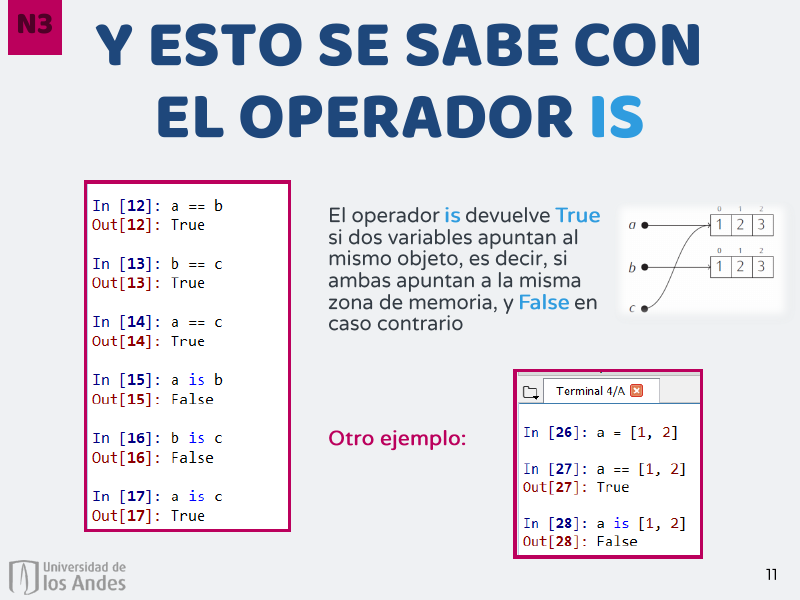

In [124]:
p()

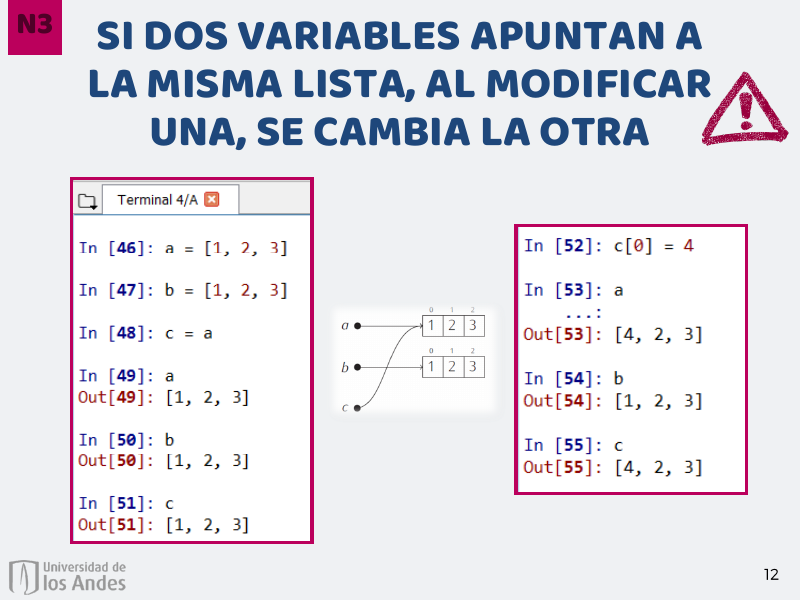

In [125]:
p()

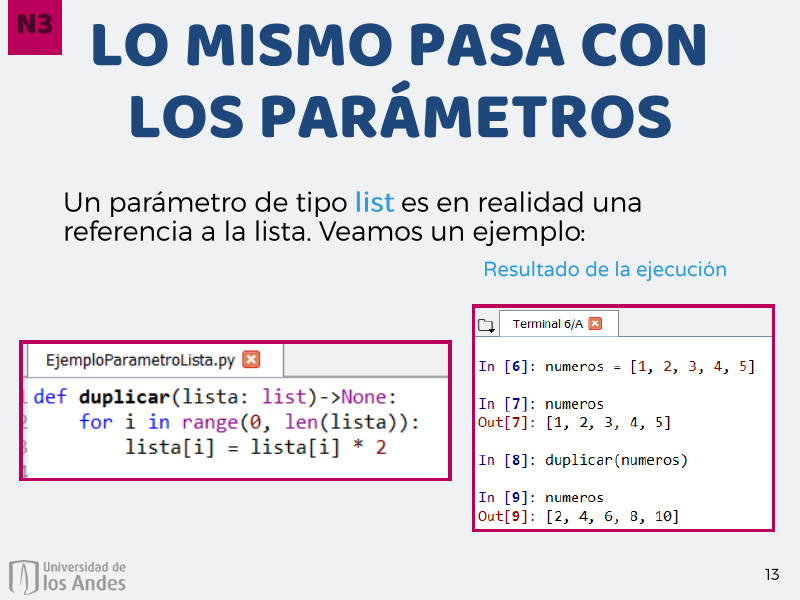

In [126]:
p()

In [317]:
frutitas = ["🍏", "🍎", "🍐", "🍊", "🍋", "🍌", "🍉", "🍇"]

In [318]:
def multiplicar(lista:list)->None:
    i=0
    for i in range(0,len(lista)):
        lista[i] = lista[i] * (i+1)
        print(i,lista[i])

In [319]:
multiplicar(frutitas)

0 🍏
1 🍎🍎
2 🍐🍐🍐
3 🍊🍊🍊🍊
4 🍋🍋🍋🍋🍋
5 🍌🍌🍌🍌🍌🍌
6 🍉🍉🍉🍉🍉🍉🍉
7 🍇🍇🍇🍇🍇🍇🍇🍇


In [320]:
print(frutitas)

['🍏', '🍎🍎', '🍐🍐🍐', '🍊🍊🍊🍊', '🍋🍋🍋🍋🍋', '🍌🍌🍌🍌🍌🍌', '🍉🍉🍉🍉🍉🍉🍉', '🍇🍇🍇🍇🍇🍇🍇🍇']


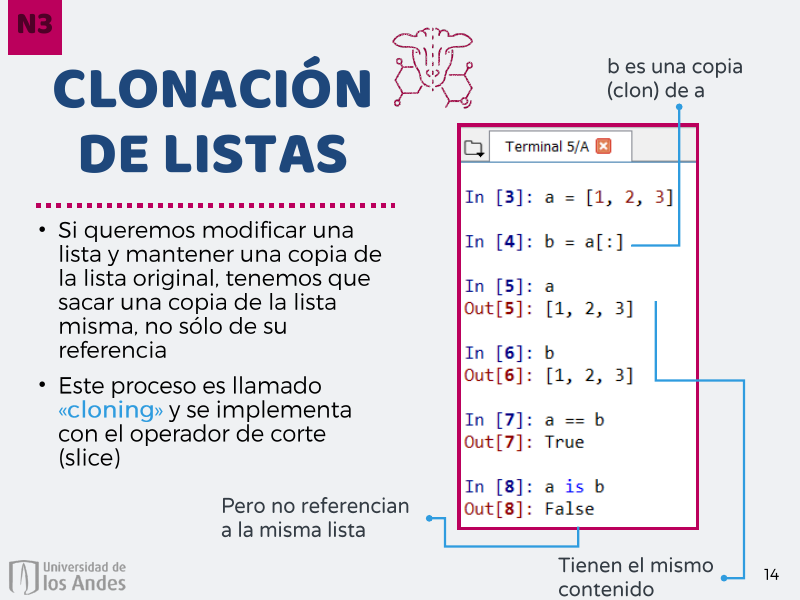

In [131]:
p()

In [132]:
🦠

SyntaxError: invalid character in identifier (<ipython-input-132-3e4698ecc8bf>, line 1)

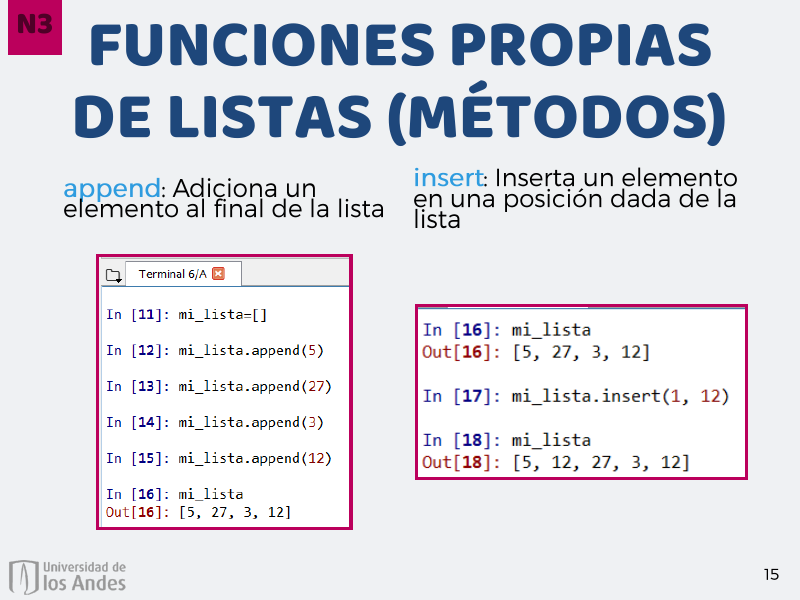

In [133]:
p()

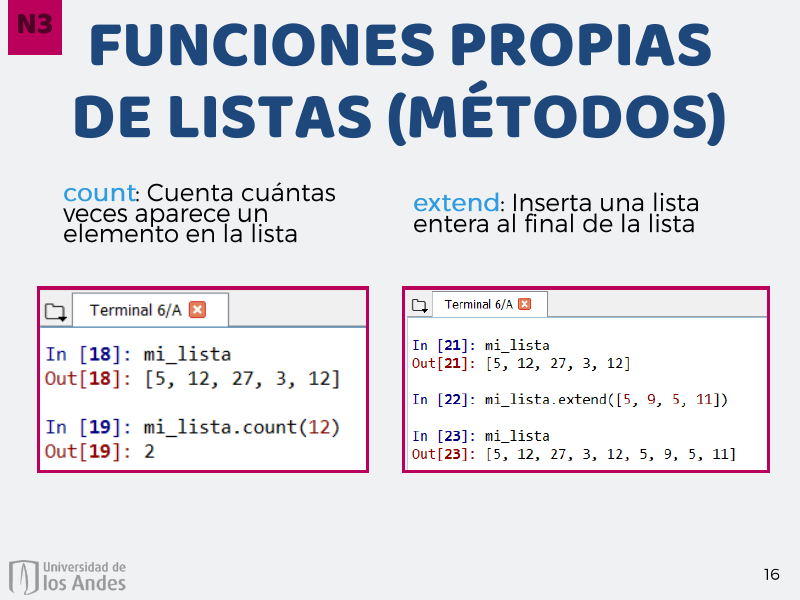

In [134]:
p()

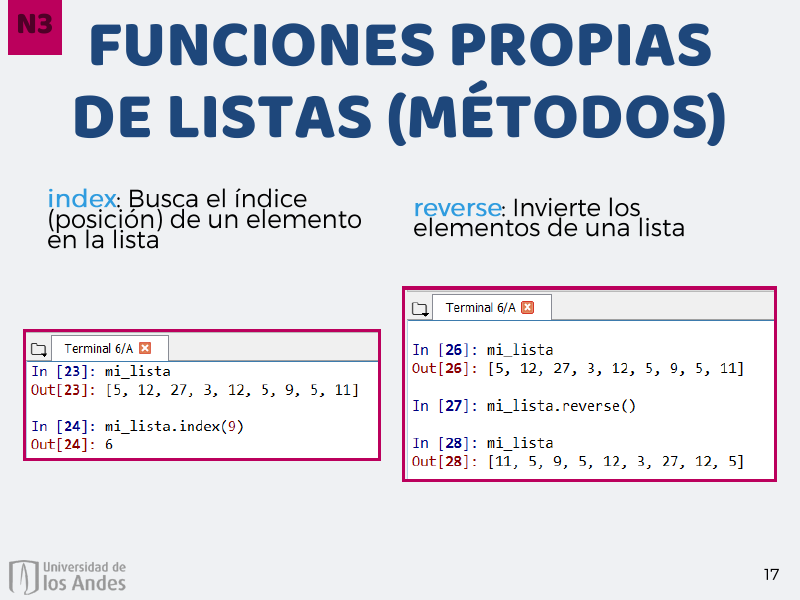

In [135]:
p()

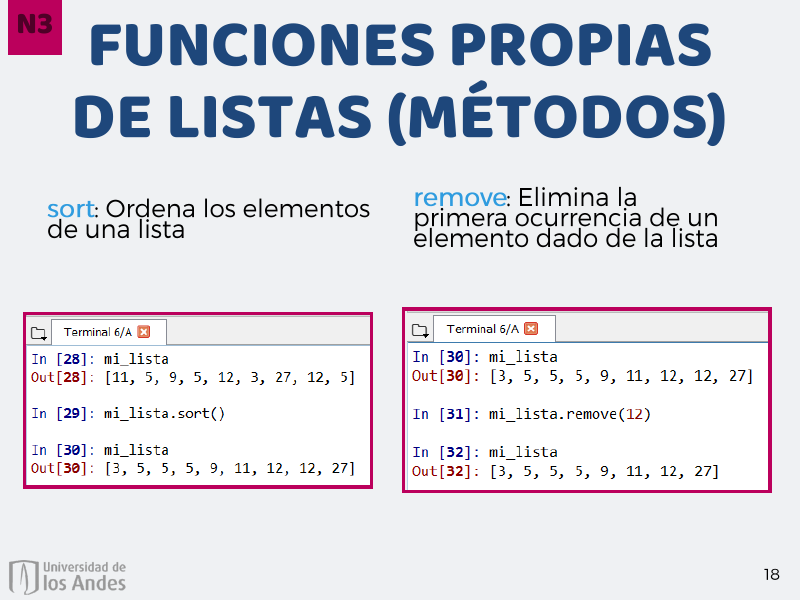

In [136]:
p()

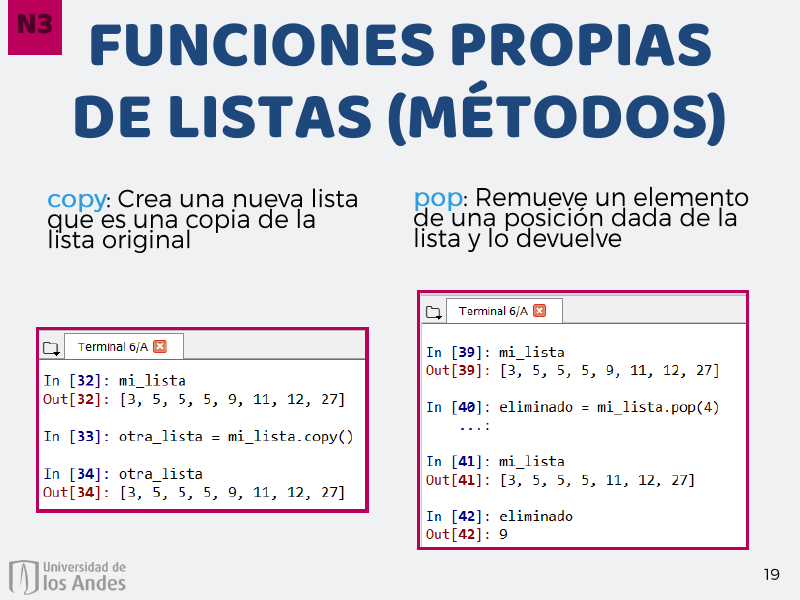

In [137]:
p()

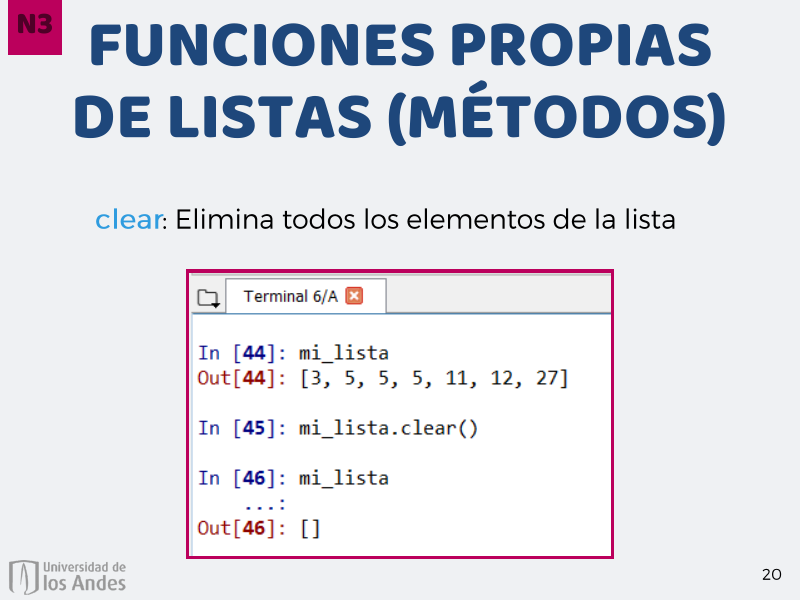

In [138]:
p()

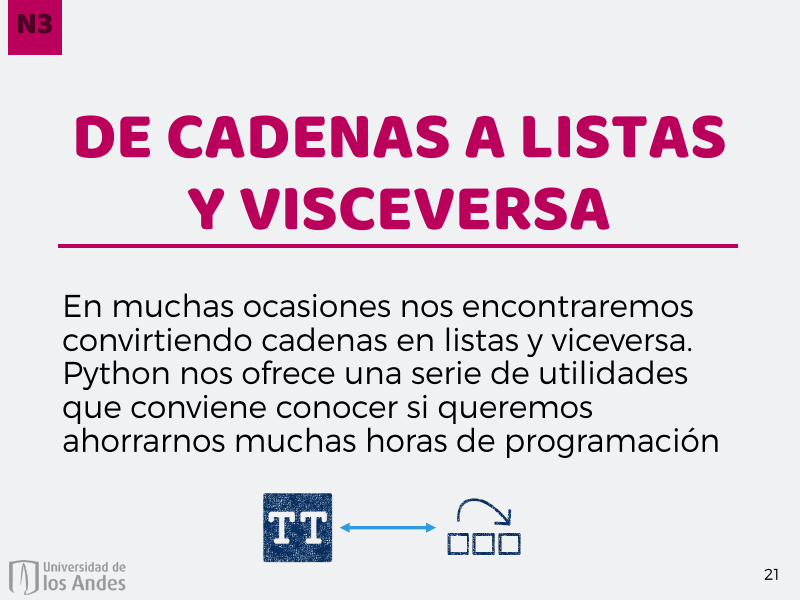

In [139]:
p()

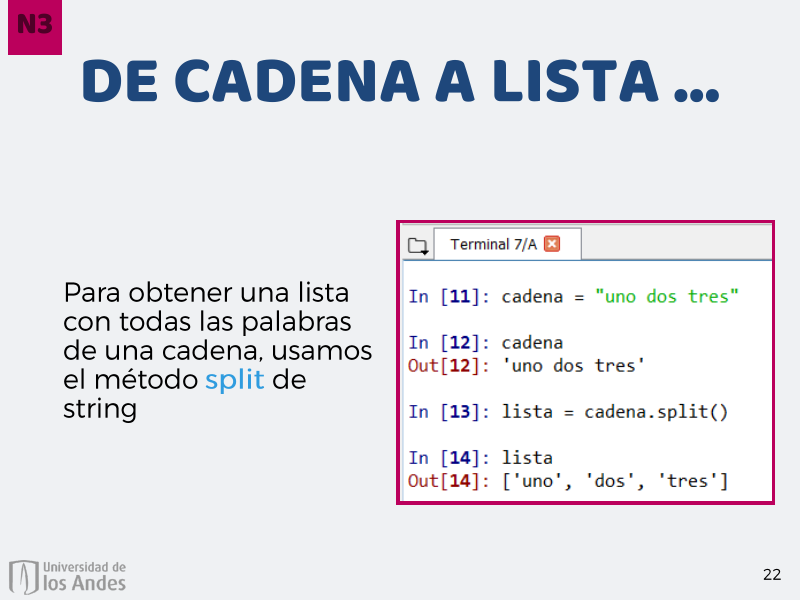

In [140]:
p()

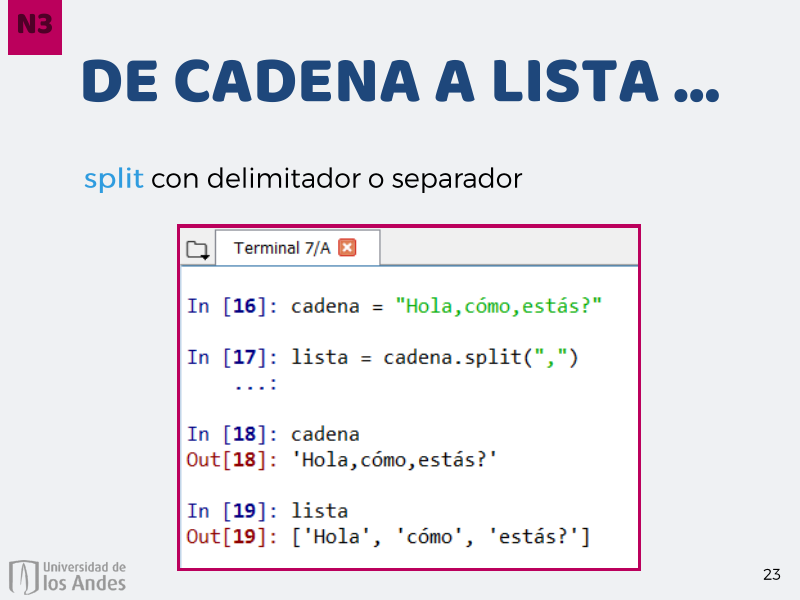

In [141]:
p()

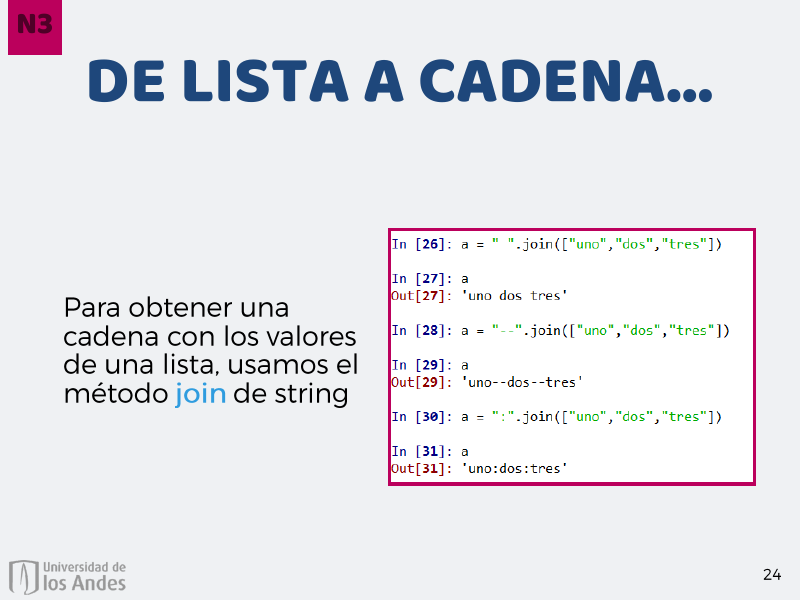

In [142]:
p()

# Invertir: Tercera solución

Invierta una cadena sin usar ciclos y usando listas.

In [143]:
def invertir(cadena:str)->str:
    lista = list(cadena)
    lista.reverse()
    return ''.join(lista)

In [144]:
invertir('ROMA')

'AMOR'

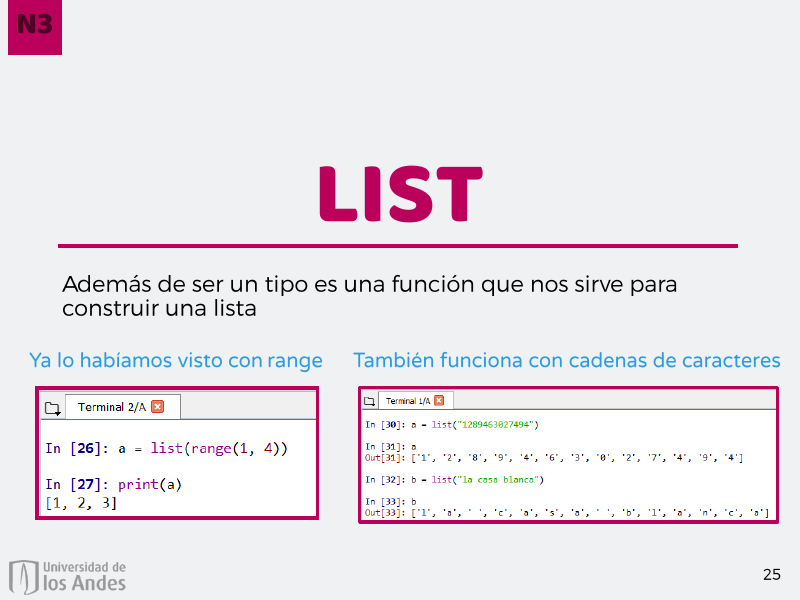

In [145]:
p()

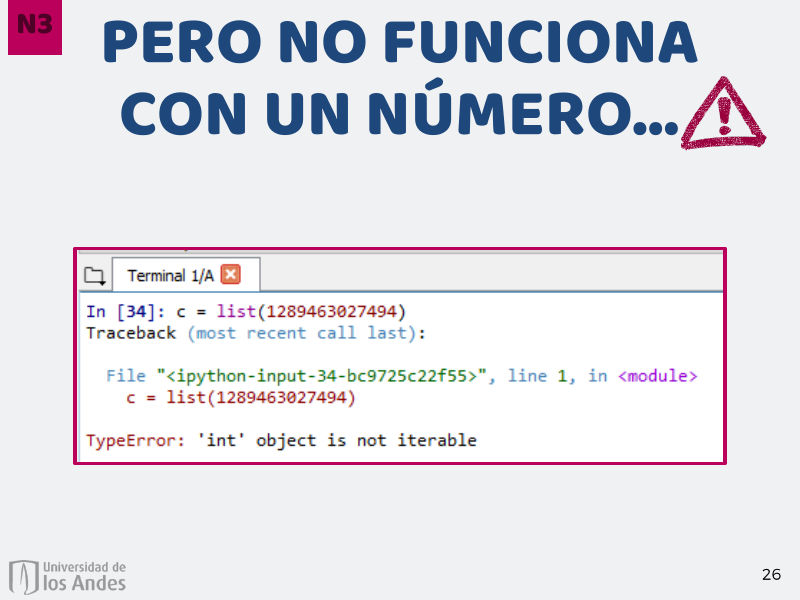

In [146]:
p()

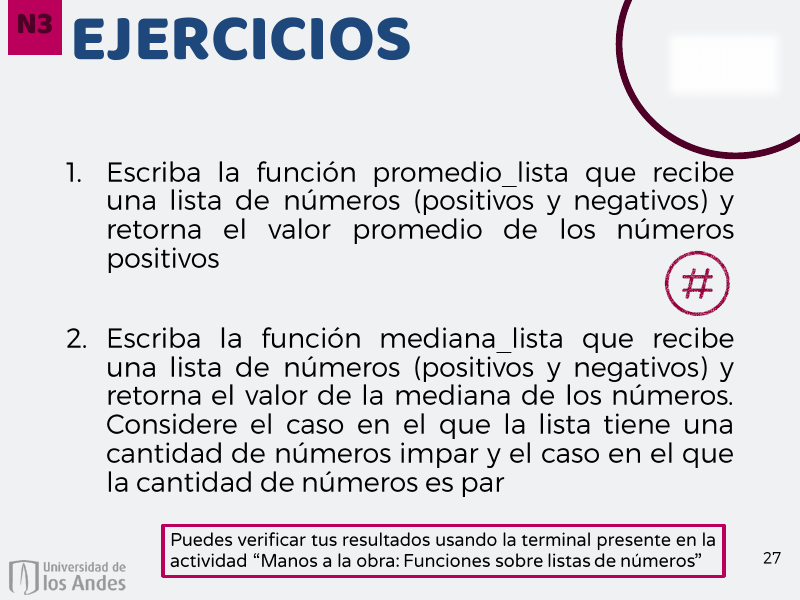

In [147]:
p()

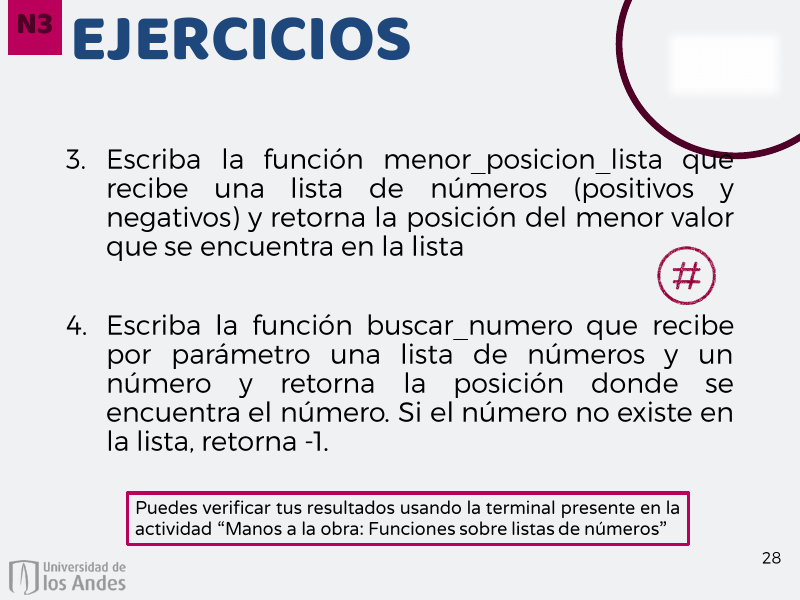

In [148]:
p()